## Fundamentals of Social Data Science

# Week 3 Day 3. Similarity and distance metrics 

Learning goals:
- Appreciate Jaccard Similarity between sets
- Consider how vectors are applied to matrices
- Consider how vectors can represent a direction in a space 
- Compare three corpora to get a sense of how similar vectors are betwee corpora:
    - Appreciate why cosine distance and not Euclidean distance is a useful measure of similarity.
- Examine the distance between words in a single corpus using cosine distance.
    - Do this using (as black box for now, MDS and t-SNE).


# Distance Metric: **Jaccard Similarity**

## Jaccard Similarity — Properties

- A **measure of similarity** between two sets. 

- Definition: The **size of the intersection divided by the size of the union of the sets**. 

- The **Jaccard similarity coefficient ranges from 0 to 1**, 

    -  0 indicates that the sets are disjoint (no intersection)
    -  1 indicates that the sets are identical (intersection = union)

## Jaccard Similarity — Formula

The formula for Jaccard similarity is:

$$
J(A, B) = \frac{|A \cap B|}{|A \cup B|}
$$

- where $A$ and $B$ are two sets, 
 
- $|A \cap B|$ is the number of elements in the intersection of $A$ and $B$,

- $|A \cup B|$ is the number of elements in the union of $A$ and $B$.

## Jaccard Similarity — Example

- So if we have two subreddits, one will have a vocabulary with $A$ terms, the other will have a vocabulary with $B$ terms. 

- Thus **Jaccord similarity is a measure of how many of these terms overlap**. 

- It is relatively easy to see this in Python. While there are specialist commands, it's also as simple as drafting the set operations: 

## Jaccard Similarity — Python Code

In [4]:
# Performing Jaccard Similarity

# Define lists of fruits and vegetables
fruits = ["apple", "banana", "cherry", "date", "elderberry"]
vegetables = ["asparagus", "broccoli", "carrot", "date", "elderberry", "sprouts", "onions"]
edible_spheres = ["apple", "cherry", "date", "carrot", "sprouts", "onions"]

# Convert lists to sets
set_fruits = set(fruits)
set_vegetables = set(vegetables)
set_spheres = set(edible_spheres)

# Define general Jaccard similarity function

def jaccard_similarity(set_A, set_B):
    intersection_AB = set_A.intersection(set_B)
    union_AB = set_A.union(set_B)
    jaccard_similarity_AB = len(intersection_AB) / len(union_AB)
    return intersection_AB,union_AB,jaccard_similarity_AB

# Calculate Jaccard similarity for fruits and vegetables
intersection_fruits_vegetables, union_fruits_vegetables, jaccard_similarity_fruits_vegetables = jaccard_similarity(set_fruits, set_vegetables)

# Calculate Jaccard similarity for fruits and spheres
intersection_fruits_spheres, union_fruits_spheres, jaccard_similarity_fruits_spheres = jaccard_similarity(set_fruits, set_spheres) 

# Calculate Jaccard similarity for vegetables and spheres
intersection_vegetables_spheres, union_vegetables_spheres, jaccard_similarity_vegetables_spheres = jaccard_similarity(set_vegetables, set_spheres)


print(f"Intersection (Fruits & Vegetables): {intersection_fruits_vegetables}")
print(f"Union (Fruits & Vegetables): {union_fruits_vegetables}")
print(f"Jaccard Similarity (Fruits & Vegetables): {jaccard_similarity_fruits_vegetables:.2f}")
print()

print(f"Intersection (Fruits & Spheres): {intersection_fruits_spheres}")
print(f"Union (Fruits & Spheres): {union_fruits_spheres}")
print(f"Jaccard Similarity (Fruits & Spheres): {jaccard_similarity_fruits_spheres:.2f}")
print()

print(f"Intersection (Vegetables & Spheres): {intersection_vegetables_spheres}")
print(f"Union (Vegetables & Spheres): {union_vegetables_spheres}")
print(f"Jaccard Similarity (Vegetables & Spheres): {jaccard_similarity_vegetables_spheres:.2f}")

Intersection (Fruits & Vegetables): {'date', 'elderberry'}
Union (Fruits & Vegetables): {'cherry', 'carrot', 'banana', 'sprouts', 'onions', 'broccoli', 'asparagus', 'elderberry', 'apple', 'date'}
Jaccard Similarity (Fruits & Vegetables): 0.20

Intersection (Fruits & Spheres): {'cherry', 'date', 'apple'}
Union (Fruits & Spheres): {'cherry', 'carrot', 'banana', 'sprouts', 'onions', 'elderberry', 'apple', 'date'}
Jaccard Similarity (Fruits & Spheres): 0.38

Intersection (Vegetables & Spheres): {'carrot', 'onions', 'date', 'sprouts'}
Union (Vegetables & Spheres): {'carrot', 'cherry', 'sprouts', 'onions', 'broccoli', 'asparagus', 'elderberry', 'apple', 'date'}
Jaccard Similarity (Vegetables & Spheres): 0.44


# Vector representations 

While Jaccard can tell us some sense of how much overlap there is in the presence or absence of terms, there is much more we can do when we think of terms as vectors. To appreciate this will involve a bit of a dive into linear algebra. Let's take this step by step starting with how linear algebea worked in our original TF-IDF scores. 

## Going back to TF-IDF

- TF-IDF is a way to calculate 

    - **"term frequencies" which will be per document per term**

        - Thus, the term frequencies are **a matrix — One score per term, per document**.
 
    - and **inverse document frequencies, which are one value per document**. 
    
        - The inverse document frequencies are **a vector — One score per document**. 


## What is a Vectorizer

- A method to transform text into vectors

- Like a one-dimensional matrix

### Difference between vectors and list

- They appear the same, but they are different

|Vector|List|
|:-----|:-----|
|**Only includes numbers**|Lists can include objects <br><br>- An array is a data structure that may or may not be restricted to numbers|
|**Vectors represent a transformation**<br><br>- Take a baseline and the vector represents some distance away from that baseline.<br><br>-It _transforms_ an input value according to the values in the vector.<br><br><br><br>[Example]<br><br>- If we start from an origin (0,0,0) then the vector (1,.5,.25) means that we will go 1 unit in the first direction, one half in the second direction, and one quarter in the third direction.<br><br>In a 3d Cube this is like going up one side all the way then going 2/3 of the way over and one third of the way back.<br><br>- The point will now end up somewhere inside the cube.<br><br>- If we add that vector again, then we will again go 1 unit up, again a half unit to the side, and then another half unit back.<br><br><br><br> See "Essence of Linear Algebra", viewing videos 1 through 4 (total of 40 minutes) — https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab|


## Vectors as a way to move points around

- If we treat the baseline as 0,0,0: we can consider vectors as points in a space

- Other than that, vectors are ways to move points around, and warp where the points are in the space

### Example of vectors

1. Imagine a space with all the words in it. 

2. Each word can be seen as a having a location in this space. Some words will be more near to each other and some words will be further apart. 

3. By locating words that are similar we can discover similar concepts. For example the word crocodile might be close to the word alligator. (I know they are different species but they sure get talked about alot in the same places.) 

4. But also, **since words are vectors, we can think about how their distance transforms another word**. 

    a. For example, the vectors for health + vehicle might gets you somewhere where the closest word is ambulance.

### Conceptualising 'Space'

- Here's where it gets hard and where we often lose a lot of people, but I think this point is really important

- **'Space' is the 'space of possibilities for this data'**

    - **Can have many dimension**

    - "Space" in this sense is not really about space in the 3D world we live in space


#### Using TF-IDF to conceptualise 'Space'

- The IDF vector had 12 elements in it

    - Each one of these was a scalar (i.e. single) value

    - Each value transformed some cells within the TF matrices, one after the other — upon multiplication

- We can think of each text document as its own vector in the 12-dimensional term-frequency space

    - Each word is its own dimension

- The IDF vector then transformed each TF vector in some way when we multiply

    - might make some values larger (if the scalar — in the IDF vector — was above 1) and some values lower (if it was between 0 and 1)

- **So when we say we are weighting the term frequency by the inverse document frequency, we can also mean we are moving our values around in the term space to account for how noteworthy the terms are.**


## Linear algebra

- Like mapping coordinates in all kinds of spaces where we can still have an understanding of what is near and what is far, whether or not we can visualise it directly

### Example

- Imagine we are only working with two terms ("immigrant" and "migrant") instead of all the words

- So we calculate our TF-IDF scores for all the words like we did, but we are only interested in the words: "immigrant" and "migrant"

- Instead of looking to see what are the top words in this corpus, we instead just take the scores for these two words in this corpus

- So for the Reddit exercise, imagine we have three subreddits (`unitedkingdom`, `uknews`, and `ukpolitics`). We will then have three vectors (1 for each sub-reddit) in the 2-dimensional migrant-immigrant "term-space". 

- Thus we could plot all three of the vectors, but rather than as points, **imagine them as distance travelled from the origin**.

- Here we aren't interested in whether `uknews` and `ukpolitics` use the same words. 

- We are interested in **where the words 'migrant' and 'immigrant' are located relative to each other**. 

## Representing a vector

- **Key Point**: An **ORDERED** collection of **NUMBERS**

1. Array data structure

2. List

3. Tuple



# Calculating distance



Let's focus on the intuitive understanding of this from the visual diagram. Then we will circle back to the code to look at how linear algebra plays a role here through the calculations of distance using these lines of code: 

~~~
dist = np.linalg.norm(vec1 - vec2)
~~~

and 

~~~
cos_sim = np.dot(vec1, vec2)/(np.linalg.norm(vec1)*np.linalg.norm(vec2))
angle = np.degrees(np.arccos(cos_sim))
~~~

## Plot vectors in a 2D term space

In [10]:
# Define functions

import numpy as np
import matplotlib.pyplot as plt

# Define function to plot subreddit vectors in a 2D term space
def plot_subreddit_term_space(vectors, term1, term2, title=None):
    """
    Plot subreddit vectors in a 2D term space.
    
    Parameters:
    - vectors: dict with subreddit names as keys and np.arrays as values
    - term1: string name of first term (x-axis)
    - term2: string name of second term (y-axis)
    - title: optional custom title
    """
    plt.figure(figsize=(4, 4))
    ax = plt.gca()
    
    # Plot vectors from origin
    colors = ['blue', 'green', 'red']
    for (name, vec), color in zip(vectors.items(), colors):
        plt.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1,
                  color=color, label=name, width=0.008)
        
             # Quiver draws arrows, 
             # With (0,0) as origin
             # vec[0] and vec[1] as x and y components
             # angles='xy', scale_units='xy', scale=1 sets the vector’s orientation and scale in 2D Cartesian coordinates.
    
    # Style the plot
    plt.grid(True, linestyle='--', alpha=0.7)

    # Fix: stack all vectors / flatten the 2D vectors into one array 
    all_values = np.concatenate([v for v in vectors.values()]) 
    
    # Find the max value and scale it up by 20% --> Ensure all vectors are visible
    max_val = np.max(all_values) * 1.2

    # Set axis boundaries
    plt.xlim(-0.1, max_val)
    plt.ylim(-0.1, max_val)

    # Set aspect ratio to be equal --> one unit on the x-axis is the same length as one unit on the y-axis
    ax.set_aspect('equal')

    # Set spines (axis lines)
    ax.spines['left'].set_position('zero') # set position of y-axis to x=0
    ax.spines['bottom'].set_position('zero') # set position of x-axis to y=0
    ax.spines['right'].set_visible(False) # remove right spine
    ax.spines['top'].set_visible(False) # remove top spine
    
    # Labels
    plt.xlabel(f"'{term1}' TF-IDF score")
    plt.ylabel(f"'{term2}' TF-IDF score")
    plt.title(title or f"Subreddit Vectors in {term1}-{term2} Space")
    plt.legend()
    
    plt.tight_layout()
    plt.show()


## Python code: <br><br> Euclidean Distance using `np.linalg.norm(vec1 - vec2)`, <br><br> Cosine Similarity using `cos_sim = np.dot(vec1, vec2)/(np.linalg.norm(vec1) * np.linalg.norm(vec2))`,<br><br> and angles using `angle = np.degrees(np.arccos(cos_sim))`

In [13]:
# Define function to report distances between vectors
def report_distances(vectors):
    """
    Report the distances between subreddit vectors.
    
    Parameters:
    - vectors: dict with subreddit names as keys and np.arrays as values
    """
    for name1, vec1 in vectors.items():
        for name2, vec2 in vectors.items():

            # avoid duplicate comparisons
            if name1 < name2: 

                # Calculate Euclidean distance between vectors (ie straight line distance)
                dist = np.linalg.norm(vec1 - vec2)
                print(f"Euclidean distance between '{name1}' and '{name2}': {dist:.2f}")
                
    # Print angles between vectors
    print("\nAngles between subreddit vectors:")
    for name1, vec1 in vectors.items():
        for name2, vec2 in vectors.items():

            # avoid duplicate comparisons
            if name1 < name2:  

                # Calculate cosine similarity between vectors (range from -1 to 1)
                cos_sim = np.dot(vec1, vec2)/(np.linalg.norm(vec1) * np.linalg.norm(vec2))

                # Convert cosine similarity to angle in degrees
                angle = np.degrees(np.arccos(cos_sim))


                print(f"Angle between vectors '{name1}' vs '{name2}': {angle:.1f}°")

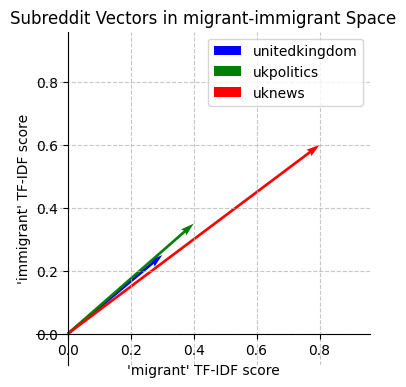

Euclidean distance between 'ukpolitics' and 'unitedkingdom': 0.14
Euclidean distance between 'uknews' and 'unitedkingdom': 0.61
Euclidean distance between 'uknews' and 'ukpolitics': 0.47

Angles between subreddit vectors:
Angle between vectors 'ukpolitics' vs 'unitedkingdom': 1.4°
Angle between vectors 'uknews' vs 'unitedkingdom': 2.9°
Angle between vectors 'uknews' vs 'ukpolitics': 4.3°


In [14]:
# First stylsed example: migrant-immigrant space
# These terms are often used similarly across subreddits
migrant_immigrant_vectors = {
    'unitedkingdom': np.array([0.3, 0.25]),    # moderate usage of both terms
    'ukpolitics': np.array([0.4, 0.35]),       # slightly higher usage of both
    'uknews': np.array([0.8, 0.6])             # much higher usage of both terms
}

plot_subreddit_term_space(migrant_immigrant_vectors, 'migrant', 'immigrant')

report_distances(migrant_immigrant_vectors)

In the first stylised example of migrants vs immigrants, we see a few patterns. 

Note: **these points represent TF-IDF vectors of how noteworthy each term is in that corpus**

1. uknews is slightly further to migrants than immagrants relative to the other two subreddits, but its really not much. 

2. All three tend to extend out from the origin in effectively the same direction. 

    a. The ratio of noteworthiness of 'immigrant' relative to 'migrant' is approximately the same across all corpuses (subreddits)

3. But uknews extends out further 

    a. Implication: while these two words ('immigrant' and 'migrant') mean sort of the same thing in each corpus _relative to each other_, 
    
    b. the words are much more noteworthy in UK news. 
    
    c. This would suggest that we would see **MORE stories focused on immigrants and migrants in the uknews subreddit than in the other two subreddits**, while preserving the ratio within the subreddit as mentioned in point 2a

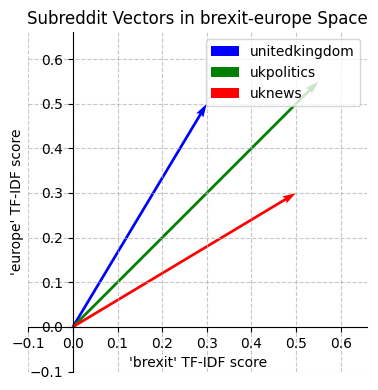

Euclidean distance between 'ukpolitics' and 'unitedkingdom': 0.25
Euclidean distance between 'uknews' and 'unitedkingdom': 0.28
Euclidean distance between 'uknews' and 'ukpolitics': 0.25

Angles between subreddit vectors:
Angle between vectors 'ukpolitics' vs 'unitedkingdom': 14.0°
Angle between vectors 'uknews' vs 'unitedkingdom': 28.1°
Angle between vectors 'uknews' vs 'ukpolitics': 14.0°


In [15]:
# Second example: brexit-europe space
# These terms might show more divergence in usage patterns
brexit_europe_vectors = {
    'unitedkingdom': np.array([0.3, 0.5]),     # more europe than brexit
    'ukpolitics': np.array([0.55, 0.55]),        # both similar, but higher usage
    'uknews': np.array([0.5, 0.3])             # more brexit than europe
}

plot_subreddit_term_space(brexit_europe_vectors, 'brexit', 'europe')
report_distances(brexit_europe_vectors)

In the second example the three vectors diverge somewhat. 

1. So mentions of 'Europe' are more noteworthy than 'Brexit' in unitedkingdom subreddit. 

2. It's about equal in ukpolitics subreddit

3. In uknews subreddit 'Brexit' is more noteworthy than 'Europe'.  

## Clarifying TF-IDF Vectors

- These points represent TF-IDF vectors of how noteworthy each term is in that corpus

- So if both terms are equally noteworthy they will show up on the diagonal (.1,.1) or (.5, .5)

- Not mandatory for terms to be equally noteworthy

    - All the papers might mention Brexit more than Europe. 
    
    
- Key Point: **What we are showing is whether the distance between these terms is itself interesting.** 

# Examining distance

## Euclidean Distance (`dist = np.linalg.norm(vec1 - vec2)`)

1. Akin to drawing a **straight line between the points**. 

2. Key Question: **How far is one from another?** 

- So in the immigrant-migrant example 

    - we can see that uknews is almost twice as far away from the origin as the other two. 
    
    - But while it is twice as far away, it is twice as far away _in the same direction_. 
    
        - This means that in **'immigrant-migrant' space** these **two terms** are (_relatively speaking_) **similarly noteworthy** across the subs.

##  Cosine Similarity Score (`cos_sim = np.dot(vec1, vec2)/(np.linalg.norm(vec1)*np.linalg.norm(vec2))`) <br><br> Cosine distance (`1 - cos_sim`)

1. Cosine distance refers to the **angle rather than the direction**. 

    a. When things **diverge in cosine distance** that means that these **terms are of different noteworthiness in the different corpora**. 
    
- In the Brexit-Europe example, 

    - All three are about the same distance from each other but the **angle is very different**. 
    
    - Thus we can understand unitedkingdom subreddit as being semantically in the middle of the other two even though it is furthest from the origin. 
    
    - **While the subreddit's distance from each other is about equal that does not mean that they think of these words equally**. 
    
        - If you go to one you're going to get more Brexit talk and if you go to the other you'll get more Europe talk (likely without as much reference to Brexit). 

## Using a cosine distance matrix

### Steps:

1. Calculate the cosine distance between any two terms, 

2. Produce a distance matrix much like we could have done with physical distances. 

### Transitivity of the Cosine Distance Matrix and the Curse of Dimensionality

- **The distance from A to B + the distance from B to C will necessarily not be the distance from A to C**

- Implication:

    - It means that there is lots of information contained in the distance matrix that cannot be easily visiualised directly. 
    
    - We cannot just plot all these points on an XY grid as is and make sense of them

- This is related to a topic in statistics referred to as 'the curse of dimensionality'


** Curse of Dimensionality**

- it means that **while we have all the information in a higher dimensional space, we cannot fully represent this information in a simpler space like 2D.**

#### Transforming Cosine Distances into meaningful approximations:

##### **Method 1: Multidimensional Scaling (MDS)**

- Find two new vectors such that each term will get a value in each vector

- One will be the vector we plot on the X axis and one will be the vector we plot on the Y axis

##### **Method 2: t-Distributed Stochastic Neighbor Embedding (t-SNE)**

- Similar to MDS but uses a more complex algorithm

- More useful when we have a very2large number of terms to present

#### Illustrating the transformation of Cosine Distances into meaningful approximations

For the illustration of these two concepts it really pays to use real data. So for that reason, I turn from here to the lab. In the lab, we see a dramatic refactoring of the repository since the last lecture. While I am tempted to drill into MDS and t-SNE from a conceptual point of view, in the interests of time and brevity I will defer to the lab. There you will see how I can collect reddit posts similar to last time and again report some TF-IDF values. 

**To see where the action happens, have a look at `analysis.py`**

**Within the `plot_word_similarities` method is the following code:**

~~~python
    # Get vectors for top terms
    term_vectors = tfidf_matrix.T[top_indices].toarray()
    top_terms = feature_names[top_indices]
    
    # Calculate similarities and distances
    similarities = cosine_similarity(term_vectors)
    distances = 1 - similarities
    
    # Use MDS for 2D projection
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
    coords = mds.fit_transform(distances)
~~~

- This code first gets the TFIDF matrix. 

- Then this is used to create a matrix of cosine_similarity with the term vectors (so its shape will be term\*term). 

- Then we create an MDS model with 2 components. 

    - These will be plotted as our X and Y values. 
    
    - `coors` are the two components from the mds using the cosine distance. 


**This is pretty similar to what happens in the t-SNE approach as well:**

~~~python
    # Get vectors for all terms
    term_vectors = tfidf_matrix.T.toarray()
        
    # Calculate t-SNE for all terms
    tsne = TSNE(n_components=2, 
                perplexity=min(30, len(feature_names)/4), 
                random_state=42)
    coords = tsne.fit_transform(term_vectors)
~~~

- This code first gets the TFIDF matrix

- Define the t-SNE function

    - Note: t-SNE is not deterministic but is instead sensitive to randomness as it tries to fit a solution

        - Hence, we use the `random_state` parameter (which means we will get the same results every time we use the same random_state)

        - You can alter the state and use the same data to see a slightly different outcome. It should make only a tiny difference. 

- Create a t-SNE model with 2 components

    - `coors` are the two components from the t-SNE using the cosine distance. 

#### Summary

**In both cases, the TFIDF matrix is transformed through the algorithm and we get 2 components which we can then plot.** 

# Notes for Lab

In the lab you can step through the cells to see how we apply these values first to a Jaccard Similarity and then MDS and t-SNE to our data.

## Why perform Jaccad Similarity, MDS, and t-SNE on TF-IDF vectors and not simply on counts of words per document?

- Since documents can be different sizes with therefore different numbers of words, 

- TF-IDF does a good job of **reweighting the words** 

- So that **their noteworthiness becomes a better measure of their appearance in a document** than the raw count scores.


In the lab, run the notebook on your own chosen subs. Explore the MDS and t-SNE results and see if the results makes patterns clear to you. We will be looking here at these subs separately but in the next lecture we will be combining them in some ways. In particular we will see if we can tell these subs apart using Naive Bayes Clustering and k-means analysis. We will also introduce some classic metrics for classification: precision, recall, specificity, sensitivity, and the F1 score.